## 쇼핑인사이트 키워드별 트렌드 조회
- 네이버 통합검색의 쇼핑 영역과 네이버쇼핑에서 특정 쇼핑 분야의 검색 클릭 추이를 검색 키워드별로 조회한 데이터를 JSON 형식으로 반환

In [27]:
import json
import urllib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [62]:
url = "https://openapi.naver.com/v1/datalab/shopping/category/keywords";
body = {
    "startDate": "2020-01-01",
    "endDate": "2021-12-01",
    "timeUnit": "month",
    "category": "50000006",
#     "category": "50000008",
    "keyword": [
#         {"name": "생활/건강/마스크", "param": ["마스크"]},
#         {"name": "생활/건강/진단키트", "param": ["진단키트"]},
        {"name": "식품/홈카페", "param": ["홈카페"]},
        {"name": "식품/커피원두", "param": ["커피원두"]},
    ],
    "device": "pc",
    "gender": "f",
    "ages": ['20', '30']
}  # 변경

#url = "https://openapi.naver.com/v1/datalab/shopping/categories";
#body = "{\"startDate\":\"2017-08-01\",\"endDate\":\"2017-09-30\",\"timeUnit\":\"month\",\"category\":[{\"name\":\"패션의류\",\"param\":[\"50000000\"]},{\"name\":\"화장품/미용\",\"param\":[\"50000002\"]}],\"device\":\"pc\",\"ages\":[\"20\",\"30\"],\"gender\":\"f\"}";

In [63]:
import os
import sys
import urllib.request
client_id = "nvrFMuCN8sv3J3E_znSm"
client_secret = "BkaxUDdN23"

In [64]:
body = json.dumps(body, ensure_ascii=False)  # 추가

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
#     print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

In [65]:
type(response_body)

bytes

In [66]:
data = json.loads(response_body)
# data

In [67]:
tmp = pd.DataFrame(data["results"][0]["data"])
tmp.tail(2)

,period,ratio
12,2021-10-01,0.37735
13,2021-11-01,0.50314


### 데이터 전처리

In [69]:
dt = dict()
period  = []

for d in data["results"][0]["data"]:
    period.append(d["period"])
    
for i in range(2):
    ratio = []
    for j in data["results"][i]["data"]:
        ratio.append(j["ratio"])
        dt[data["results"][i]["keyword"][0]] = ratio

keyword_result_df = pd.DataFrame.from_dict(dt)
keyword_result_df["period"] = period
keyword_result_df["month"] = keyword_result_df["period"].apply(lambda month: month[2:7])
keyword_result_df.tail(2)

ValueError: arrays must all be same length

### csv파일 추출

In [60]:
keyword_result_df.to_csv("datas/keywords.csv", index=False)

### 확인

In [61]:
df = pd.read_csv("datas/keywords.csv")
df.tail(2)

,스틱커피,커피원두,period,month
1,6.31313,93.43434,2017-09-01,17-09
2,9.84848,100.00000,2017-10-01,17-10


### 데이터 시각화

#### 마스크 추이(일별?)

#### 진단키트 추이(일별?)

#### 마스크, 진단키트 추이(월별)

In [40]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale = 1.5)

from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

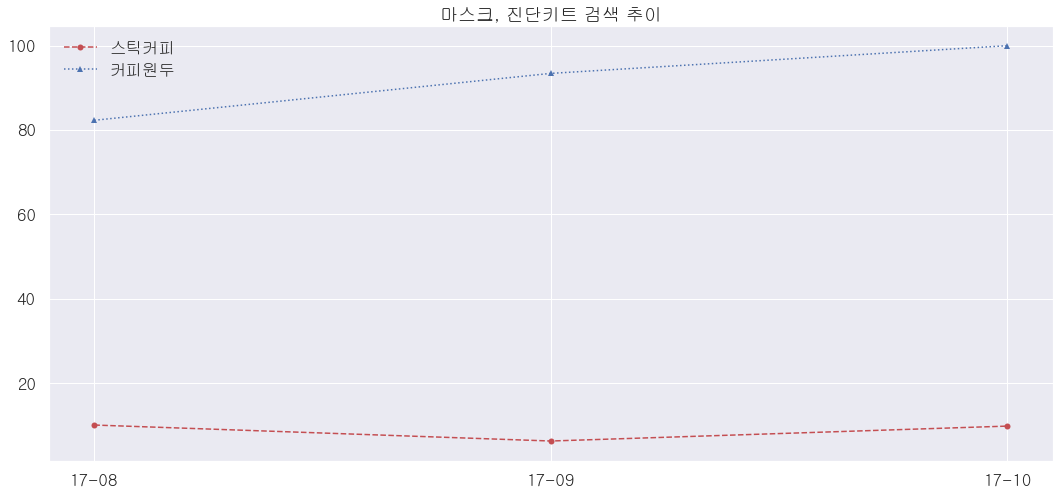

In [41]:
warnings.filterwarnings("ignore")

# 한글 안 깨지게 추가한 코드
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

plt.figure(figsize = (18, 8))
plt.title("마스크, 진단키트 검색 추이")

plt.plot(keyword_result_df["month"], keyword_result_df["스틱커피"], "ro--", label = "스틱커피")
plt.plot(keyword_result_df["month"], keyword_result_df["커피원두"], "b^:", label = "커피원두")
# plt.plot(keyword_result_df["month"], keyword_result_df["마스크"], "ro--", label = "마스크")
# plt.plot(keyword_result_df["month"], keyword_result_df["진단키트"], "b^:", label = "진단키트")

plt.legend()
plt.show()

In [113]:
# min max scale을 통해 비교하기 쉽게 시각화

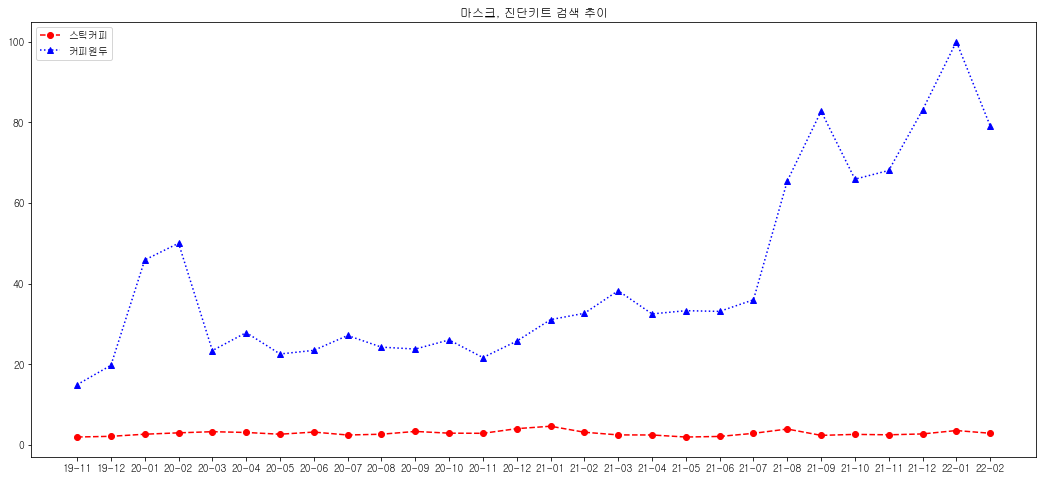

In [114]:
warnings.filterwarnings("ignore")

# 한글 안 깨지게 추가한 코드
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize = (18, 8))
plt.title("마스크, 진단키트 검색 추이")

plt.plot(keyword_result_df["month"], keyword_result_df["스틱커피"], "ro--", label = "스틱커피")
plt.plot(keyword_result_df["month"], keyword_result_df["커피원두"], "b^:", label = "커피원두")
# plt.plot(keyword_result_df["month"], minmax_scale(keyword_result_df["마스크"]), "ro--", label = "마스크")
# plt.plot(keyword_result_df["month"], minmax_scale(keyword_result_df["진단키트"]), "b^:", label = "진단키트")

plt.legend()
plt.show()